In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

dtrain = {}
with open("Fotos/train/annotation.txt") as f:
    for line in f:
       (key, val) = line.split()
       dtrain[key] = val
#Fotos/test/annotation.txt
dtrain.pop('ImageID')
dtrainf = {}

path='Fotos'
for(path,dirs,files) in os.walk(path):
    if path == 'Fotos/train/images': 
        for i in range(0,len(files)):
            nomf = str(files[i])
            lloc = nomf.find('.')
            nomf = nomf[0:lloc]
            dtrainf[i]=dtrain[nomf]

In [2]:
dval = {}
with open("Fotos/val/annotation.txt") as f:
    for line in f:
       (key2, val2) = line.split()
       dval[key2] = val2
dval.pop('ImageID')
dvalf = {}

path2='Fotos'
for(path2,dirs2,files2) in os.walk(path2):
    if path2 == 'Fotos/val/images': 
        for i in range(0,len(files2)):
            nomf2 = str(files2[i])
            lloc2 = nomf2.find('.')
            nomf2 = nomf2[0:lloc2]
            dvalf[i]=dval[nomf2]

In [3]:
pickle_in_ranks = open("ranks.pickle","rb")
ranks = pickle.load(pickle_in_ranks)

In [4]:
#Precisió

def precisio(offset, numb):

    contpr = 0
    ranks_q = ranks[offset,:]

    for j in range(0,numb):
        if(dvalf[offset]=='desconegut'):
            print("Aquest es un distractor")
            break
        elif(dvalf[offset]==dtrainf[ranks_q[j]]):
            contpr+=1
        #print(dtrainf[ranks_q[j]])

    return contpr/numb;

precisio(0,15)

Aquest es un distractor


0.0

In [5]:
#Recall

def recall(offset):
    numrell = 0
    contre = 0
    ranks_q = ranks[offset,:]

    for t in range(0, len(dtrainf)):
        if(dvalf[offset]==dtrainf[t]):
            numrell+=1

    for j in range(0,numrell):
        if(dvalf[offset]=='desconegut'):
            print("Aquest es un distractor")
            break
        elif(dvalf[offset]==dtrainf[ranks_q[j]]):
            contre+=1
        #print(dtrainf[ranks_q[j]])

    return contre/numrell

recall(4)

0.6266666666666667

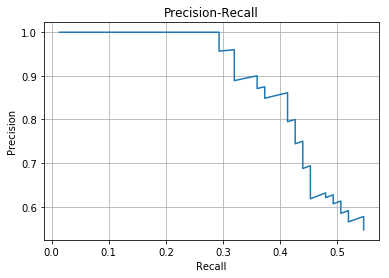

In [6]:
from math import *
from numpy import *
from pylab import *

offset = 6

prec = []
reca = []
contfin = 0
busqueda = 0
ranks_q = ranks[offset,:]

for t in range(0, len(dtrainf)):
        if(dvalf[offset]==dtrainf[t]):
            busqueda+=1
            
for n in range(0, busqueda):
    if(dvalf[offset]==dtrainf[ranks_q[n]]):
            contfin+=1
    prec.append(contfin/(n+1))
    reca.append(contfin/busqueda)

p1 = plot(reca, prec)

grid()
title('Precision-Recall')
xlabel('Recall')
ylabel('Precision')

show()

In [18]:
#Calcul AP
def AP(offset):
    contrell = 0
    precont = 0
    numrell = 0
    ranks_q = ranks[offset,:]
    
    for t in range(0, len(dtrainf)):
        if(dvalf[offset]==dtrainf[t]):
            numrell+=1

    for j in range(0,numrell):
        if(dvalf[offset]==dtrainf[ranks_q[j]]):
            contrell+=1
            precont+=contrell/(j+1)

    return precont/numrell

AP(4)

0.5909499397244463

In [26]:
#Calcul MAP
contmap = 0
numcons = 0

for d in range(0, len(dvalf)):
    if(dvalf[d]!='desconegut'):
        contmap+=AP(d)
        numcons+=1

MAP = contmap/numcons
print(MAP)

0.27251350184220063


In [24]:
len(dvalf)

477

In [10]:
#Calcul accuracy total

acc = 0;
contac = 0;

for q in range(0, len(dvalf)):
    if(dvalf[q]!='desconegut'):
        acc+=recall(q)
        contac+=1

accuracy = acc/contac
print(accuracy)

0.36369695600893376


In [11]:
import pickle

#tutorial: https://www.youtube.com/watch?v=2Tw39kZIbhs

pickle_in_val = open("valfoto.pickle","rb")
valfoto = pickle.load(pickle_in_val)

pickle_in_train = open("trainfoto.pickle","rb")
trainfoto = pickle.load(pickle_in_train)

mercat_independencia


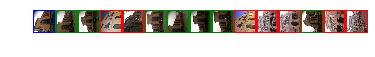

In [12]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train_images = trainfoto
x_val_images = valfoto

h,w = (224+30, 224+30)
new_image= Image.new('RGB', (h*15,w))

# Visualize ranks of the 10 queries
offset = 25 # it will show results from query #'offset' to #offset+10
ranks_q = ranks[offset,:]
print(dvalf[offset])
ima_q = Image.fromarray(x_val_images[offset])
ima_q = ImageOps.expand(ima_q, border=15, fill='blue')
new_image.paste(ima_q, (0,0))

new_image.paste( Image.fromarray(x_train_images[ranks_q[0]]), (h*(2),0))

for b in range(0,14):
    if(dvalf[offset]==dtrainf[ranks_q[b]]):
        ima_q = Image.fromarray(x_train_images[ranks_q[b]])
        ima_q = ImageOps.expand(ima_q, border=15, fill='green')
        new_image.paste(ima_q, (h*(b+1),0))
    else:
        ima_q = Image.fromarray(x_train_images[ranks_q[b]])
        ima_q = ImageOps.expand(ima_q, border=15, fill='red')
        new_image.paste(ima_q, (h*(b+1),0))

plt.imshow(new_image)
plt.axis('off')
plt.show()
new_image.save('Cercaindiv.jpg')